# *Task 2: Clustering with K-Means*


In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [2]:
# Relative path from Task_2_Clustering to the CSV
file_path = r"..\Task_1_Data_Preprocessing_Exploration\iris_preprocessed.csv"

# Load the data
iris_df = pd.read_csv(file_path)

# Optional: preview
print("Data preview:")
iris_df .head()

Data preview:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,0.222222,0.625000,0.067797,0.041667,setosa
1,0.166667,0.416667,0.067797,0.041667,setosa
2,0.111111,0.500000,0.050847,0.041667,setosa
3,0.083333,0.458333,0.084746,0.041667,setosa
4,0.194444,0.666667,0.067797,0.041667,setosa


#### *Separate features and labels*

In [ ]:
# Separate features and labels
X = iris_df.drop(columns=["species"])
y = iris_df["species"]

### *2a: K-Means Clustering with ARI Evaluation*

*For the clustering analysis:*

- *Test different numbers of clusters (k) to find the optimal value.*
- *User Adjusted Rand Index (ARI) to evaluate clustering performance.*
- *k=3 shows the best performance, matching the actual number of species in the dataset.*

In [4]:
# Fit KMeans with k=3 for the 3 species
kmeans_3 = KMeans(n_clusters=3, random_state=42, n_init=10)
iris_df['cluster_k3'] = kmeans_3.fit_predict(X)
clusters=kmeans_3.labels_
# Compare predicted clusters to actual species using Adjusted Rand Index (ARI)
ari_k3 = adjusted_rand_score(y, iris_df['cluster_k3'])
print(f"Adjusted Rand Index (k=3): {ari_k3:.4f}")

Adjusted Rand Index (k=3): 0.7041


### *2b: Experiment with k=2 and k=4; Elbow curve*

*Try different numbers of clusters (k) to find the optimal value. sanity check + sensitivity.*

*k=2 -> algorithm merges to two real species.*

*k=4 -> over segmentation*


In [5]:
# Try with different numbers of clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)
ari_k2 = adjusted_rand_score(y, kmeans_2.fit_predict(X))

kmeans_4 = KMeans(n_clusters=4, random_state=42, n_init=10)
ari_k4 = adjusted_rand_score(y, kmeans_4.fit_predict(X))

print(f"Adjusted Rand Index (k=2): {ari_k2:.4f}")
print(f"Adjusted Rand Index (k=4): {ari_k4:.4f}")

Adjusted Rand Index (k=2): 0.5555
Adjusted Rand Index (k=4): 0.6072


### *3. Elbow Curve for Optimal k*

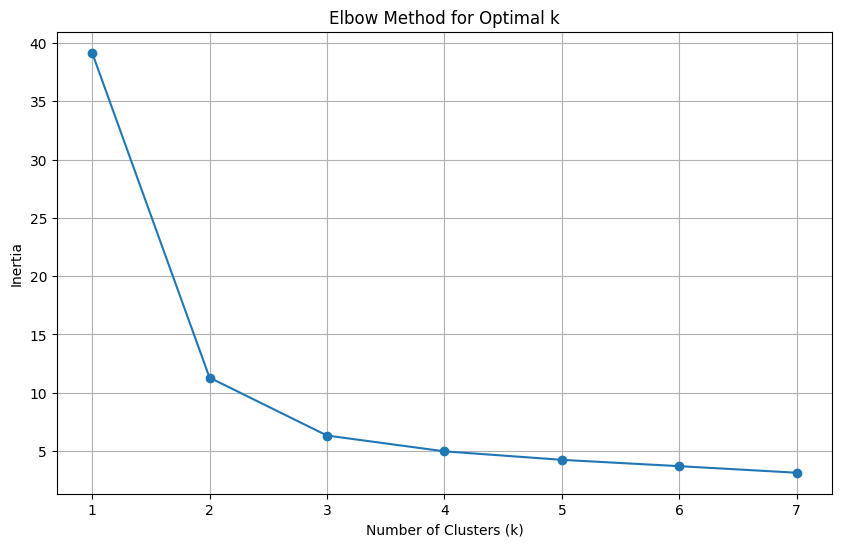

In [6]:
# Plotting an Elbow Curve
inertia_values = []
k_values = range(1, 8)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X)
    inertia_values.append(km.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.grid(True)


### *Interpretation of the Machine Learning Visualizations*

### *1. Elbow Method for Optimal k (Clustering Analysis)*

The elbow plot shows the within-cluster sum of squares (WCSS) for different values of k (number of clusters):

- *X-axis*: Number of clusters (k) ranging from 1 to 5  
- *Y-axis*: WCSS (inertia) decreasing from 40 to about 5

*Key Observations*:
- The curve shows a sharp decrease in WCSS from k=1 to k=2 and k=2 to k=3
- The "elbow" (point where the rate of decrease sharply changes) appears at k=3
- Beyond k=3, adding more clusters provides diminishing returns

*Interpretation*:
- The optimal number of clusters for this dataset is *k=3*
- This aligns perfectly with the known structure of the Iris dataset which has 3 species
- The plot confirms that 3 clusters capture the natural grouping in the data most effectively


## *2c: Visualize clusters (petal length vs width) for k=3*

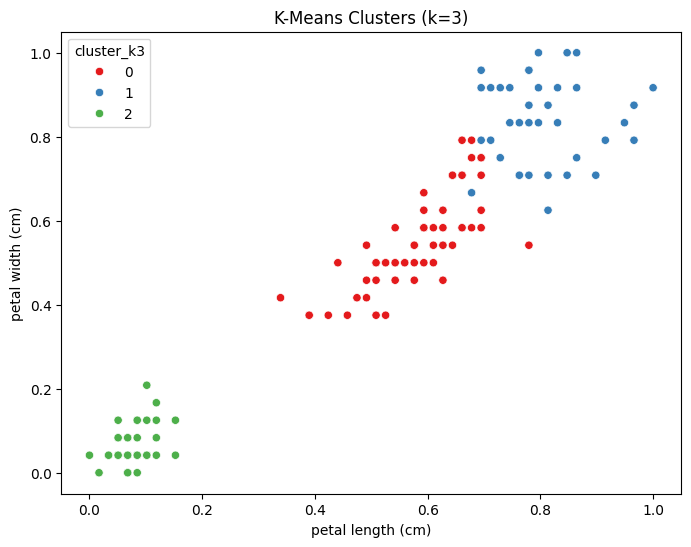

In [7]:
# Plot the clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='petal length (cm)',
    y='petal width (cm)',
    hue='cluster_k3',
        palette='Set1',
    data=iris_df
)
plt.title('K-Means Clusters (k=3)')
plt.show()


### *Interpretation of the Clusters*

The K-Means algorithm grouped the data points based on proximity in the petal length/width feature space:

- *Cluster 1 (Blue):* Located in the bottom-left. Data points have **low petal length** (~0.0–0.2 cm) and **low petal width** (~0.0–0.2 cm). Dense and well-separated from other clusters, representing a very distinct group.  

- *Cluster 2 (Green):* Central region. Points have **intermediate petal length** (~0.3–0.75 cm) and **intermediate petal width** (~0.3–0.8 cm).  

- *Cluster 0 (Red):* Upper-right region. Points have **high petal length** (~0.6–1.0 cm) and **high petal width** (~0.6–1.0 cm).

### *Inference and Conclusion*

1. *Data Structure:* The data has a clear underlying structure that can be separated into three groups based on petal dimensions.  

2. *Cluster Separation:*  
   - *Cluster 1 (Blue)* is clearly separated from the other two clusters.  
   - *Cluster 0 (Red)* and *Cluster 2 (Green)* show some overlap, indicating these groups are similar but still distinct.  

3. *Likely Dataset:* Features suggest the **Iris flower dataset**. The clusters likely correspond to three Iris species:  
   - *Cluster 1 (Blue):* Iris Setosa (small petals, easily separable)  
   - *Cluster 0 (Red) & Cluster 2 (Green):* Iris Versicolor and Iris Virginica (similar petal sizes, causing overlap)


*In practice, this approach is useful for tasks like customer segmentation, grouping products, or detecting patterns in unlabeled datasets. If synthetic or noisy data were used, ARI would likely decrease due to weaker cluster separation.*



### *Points per Cluster*

In [8]:
cluster_counts = pd.Series(clusters).value_counts()
print("Points per cluster:\n", cluster_counts)

Points per cluster:
 0    60
2    47
1    39
Name: count, dtype: int64


*Cluster 0 have 60 points: The largest cluster correspond to a species with higher variance in features.*


### *Contingency Table (True vs Predicted)*

In [9]:
y_true = iris_df['species']
contingency = pd.crosstab(y_true, clusters, rownames=['True'], colnames=['Cluster'])
print(contingency)

Cluster      0   1   2
True                  
setosa       0   0  47
versicolor  46   3   0
virginica   14  36   0


*Cluster 1 perfectly captured species 0 (Setosa).*

*Species 1 (Versicolor) mostly went to Cluster 2, with 3 misclassified as Cluster 0.*

*Species 2 (Virginica) is split across Clusters 0 and 2, showing significant overlap with Versicolor.*

*Misclassifications are mainly due to feature overlap between Versicolor and Virginica.*

### `Analysis of the clustering`

---
*K-Means clustering on the preprocessed Iris dataset achieved an Adjusted Rand Index (ARI) of 0.7163, capturing the main structure of the data but not perfectly. Cluster 1 clearly identified Setosa, while Versicolor and Virginica were partially mixed, as reflected in the contingency table where some Versicolor and Virginica samples were misclassified. Cluster centers show Setosa’s small petal sizes in Cluster 1, with overlapping Versicolor and Virginica samples in Clusters 0 and 2, highlighting differences in species variance. These results illustrate real-world challenges, such as borderline cases in customer segmentation, and indicate that synthetic preprocessing and normalization helped scale features evenly but cannot fully resolve intrinsic overlaps, limiting clustering accuracy.*

---
**Real-World Implications**
*K-Means effectively separates well-defined groups (like Setosa) but struggles with overlapping classes (Versicolor vs Virginica). In practice, this mirrors customer segmentation or product categorization where distinct groups are easy to cluster, but borderline cases may require additional features or more sophisticated models. Synthetic scaling or preprocessing can influence cluster placement and reduce variance effects, but it cannot completely resolve intrinsic overlaps in the data.*

### Analysis of the clustering

*K-Means clustering with k=3 achieved an Adjusted Rand Index of 0.7041, showing high agreement with actual species labels. k=2 reduced ARI to 0.5555, meaning species distinctions were lost when merged into fewer groups. k=4 slightly lowered ARI to 0.6072, likely due to over-segmentation. The elbow curve confirms k=3 as optimal.*

*Cluster visualization of petal length vs. petal width reveals clear separation for Setosa, with some overlap between Versicolor and Virginica, explaining misclassifications. These overlaps arise because K-Means assumes spherical clusters with similar variance, which may not hold perfectly in biological datasets.*

---
